## Exploratory Analysis on TMDB + Other Variables Not Final 

### Are certain genres more popular?

In [209]:
# 3rd party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# standard library
import sqlite3

In [47]:
df = pd.read_csv('../data/tmdb.movies.csv')

In [55]:
comment = """Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37"""
id_to_genre = {line.split(' ')[-1]:line.split(' ')[0].lower() for line in comment.split('\n')}

In [49]:
id_to_genre

{'28': 'action',
 '12': 'adventure',
 '16': 'animation',
 '35': 'comedy',
 '80': 'crime',
 '99': 'documentary',
 '18': 'drama',
 '10751': 'family',
 '14': 'fantasy',
 '36': 'history',
 '27': 'horror',
 '10402': 'music',
 '9648': 'mystery',
 '10749': 'romance',
 '878': 'science',
 '10770': 'tv',
 '53': 'thriller',
 '10752': 'war',
 '37': 'western'}

In [56]:
def convert_ids(line):
    #return type(line[1:-1].split(',')[0])
    return ','.join(sorted([id_to_genre.get(x.strip(), x.strip()) for x in line[1:-1].split(',')]))

In [51]:
df['augmented_genre'] = df.genre_ids.apply(convert_ids)

In [53]:
df[df.title == 'Avatar']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,augmented_genre
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"action,adventure,fantasy,science"


In [107]:
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'augmented_genre'],
      dtype='object')

In [109]:
df.drop(columns=["Unnamed: 0", 'id'], inplace=True)

In [110]:
df[df['vote_count'] > 100]

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,augmented_genre
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"adventure,family,fantasy"
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"adventure,animation,family,fantasy"
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"action,adventure,science"
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"animation,comedy,family"
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,"action,adventure,science"
...,...,...,...,...,...,...,...,...,...
24462,"[28, 16, 14, 12, 35, 878]",ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,"action,adventure,animation,comedy,fantasy,science"
24469,"[18, 10749, 35]",fr,Le Redoutable,6.823,2018-04-20,Godard Mon Amour,6.8,160,"comedy,drama,romance"
24472,[35],en,Father of the Year,6.794,2018-07-20,Father of the Year,5.3,235,comedy
24505,[27],es,Aterrados,6.553,2018-09-21,Terrified,6.4,111,horror


In [112]:
votes_over_100 = df[df['vote_count'] > 100]

In [125]:
grouped_genre = votes_over_100.groupby('augmented_genre')

In [143]:
grouped_genre.count() > 5

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
augmented_genre,,,,,,,,
action,True,True,True,True,True,True,True,True
"action,adventure",True,True,True,True,True,True,True,True
"action,adventure,animation",False,False,False,False,False,False,False,False
"action,adventure,animation,comedy,family",False,False,False,False,False,False,False,False
"action,adventure,animation,comedy,family,fantasy",False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
"science,thriller",True,True,True,True,True,True,True,True
"science,tv",False,False,False,False,False,False,False,False
thriller,True,True,True,True,True,True,True,True


In [144]:
genres_over_five_movies = grouped_genre.filter(lambda x: len(x) > 5)

In [148]:
genres_over_five_movies.groupby('augmented_genre').count()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
augmented_genre,,,,,,,,
action,11,11,11,11,11,11,11,11
"action,adventure",8,8,8,8,8,8,8,8
"action,adventure,comedy",10,10,10,10,10,10,10,10
"action,adventure,comedy,fantasy",6,6,6,6,6,6,6,6
"action,adventure,crime",6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...
"mystery,science,thriller",8,8,8,8,8,8,8,8
"mystery,thriller",21,21,21,21,21,21,21,21
science,6,6,6,6,6,6,6,6


In [149]:
genres_over_five_movies.groupby('augmented_genre').count()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
augmented_genre,,,,,,,,
action,11,11,11,11,11,11,11,11
"action,adventure",8,8,8,8,8,8,8,8
"action,adventure,comedy",10,10,10,10,10,10,10,10
"action,adventure,comedy,fantasy",6,6,6,6,6,6,6,6
"action,adventure,crime",6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...
"mystery,science,thriller",8,8,8,8,8,8,8,8
"mystery,thriller",21,21,21,21,21,21,21,21
science,6,6,6,6,6,6,6,6


<Axes: xlabel='augmented_genre'>

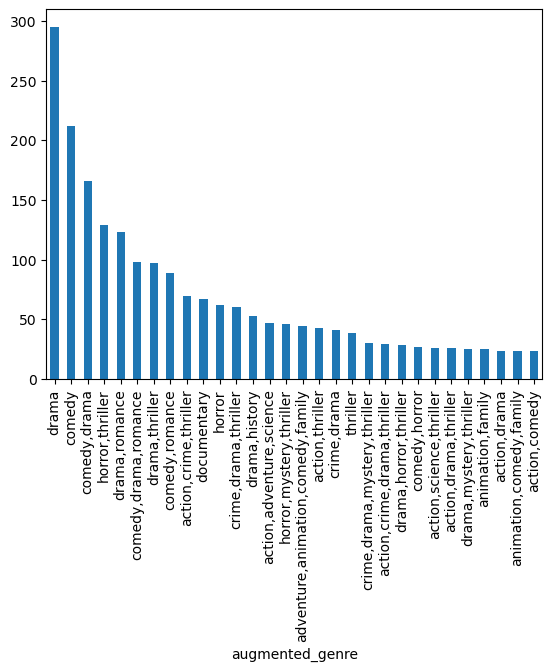

In [157]:
genres_over_five_movies.groupby('augmented_genre').count().sort_values('genre_ids', ascending=False).genre_ids.iloc[:30].plot.bar()

C:\Users\hzuo\AppData\Local\Temp\ipykernel_12364\2326615085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genres_over_five_movies.groupby('augmented_genre').median().sort_values('popularity', ascending=False).popularity.iloc[:30].plot.bar()


<Axes: xlabel='augmented_genre'>

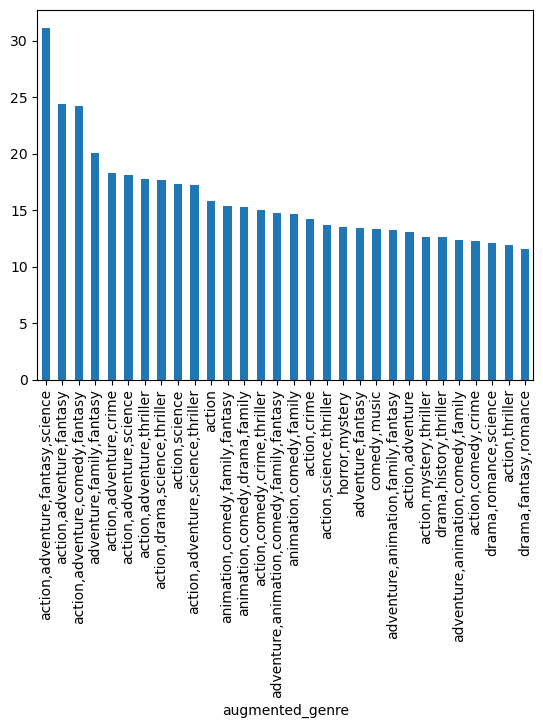

In [174]:
genres_over_five_movies.groupby('augmented_genre').median().sort_values('popularity', ascending=False).popularity.iloc[:30].plot.bar()

### Are certain years more hot in terms of popularity?

In [164]:
genres_over_five_movies['year'] = genres_over_five_movies.release_date.str.slice(stop=4)

In [173]:
over_50_movies = genres_over_five_movies.groupby('year').filter(lambda x: len(x) > 50)


In [185]:
over_50_movies.groupby('year').mean()

C:\Users\hzuo\AppData\Local\Temp\ipykernel_12364\3208799122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_50_movies.groupby('year').mean()


,popularity,vote_average,vote_count
year,,,
2010,10.593665,6.420305,1485.284264
2011,10.144743,6.357721,1168.459559
2012,10.173396,6.274615,1319.623077
2013,9.938601,6.308589,1365.656442
2014,10.234542,6.338482,1103.243902
2015,10.838840,6.250000,1367.180000
2016,10.743977,6.377143,1478.872727
2017,11.970218,6.409302,1340.741279
2018,15.958690,6.508487,966.959410


C:\Users\hzuo\AppData\Local\Temp\ipykernel_12364\4130641119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_50_movies.groupby('year').median().plot.line(y='vote_count')


<Axes: xlabel='year'>

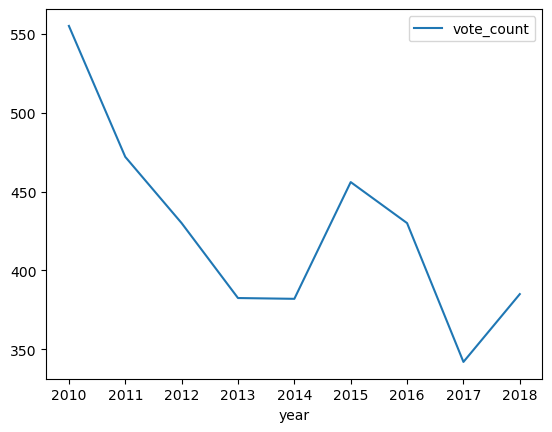

In [193]:
over_50_movies.groupby('year').median().plot.line(y='vote_count')

C:\Users\hzuo\AppData\Local\Temp\ipykernel_12364\2334026813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_50_movies.groupby('year').median().plot.line(y='vote_average')


<Axes: xlabel='year'>

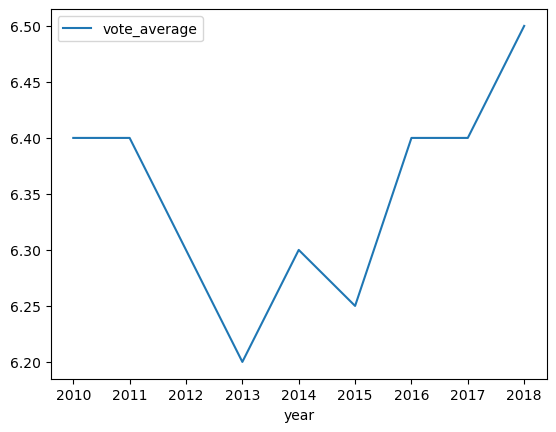

In [187]:
over_50_movies.groupby('year').median().plot.line(y='vote_average')

C:\Users\hzuo\AppData\Local\Temp\ipykernel_12364\228705581.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_50_movies.groupby('year').median().plot.line(y='popularity')


<Axes: xlabel='year'>

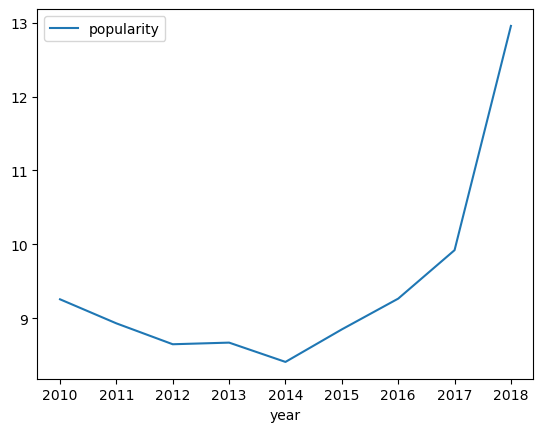

In [188]:
over_50_movies.groupby('year').median().plot.line(y='popularity')

### Other analysis - highest return on budget

In [25]:
budget_df = pd.read_csv('../data/tn.movie_budgets.csv', thousands=',')

In [26]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
budget_df.drop(columns=['id'], inplace=True)

In [28]:
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
budget_df['total_gross'] = budget_df['domestic_gross'].str.lstrip('$').str.replace(',', '').astype(np.int64) + budget_df['worldwide_gross'].str.lstrip('$').str.replace(',', '').astype(np.int64) 

In [144]:
budget_df['both_gross'] = budget_df.worldwide_gross.str.lstrip('$').str.replace(',', '').astype(np.int64)

In [30]:
budget_df['pb'] = budget_df['production_budget'].str.lstrip('$').str.replace(',', '').astype(np.int64)

In [31]:
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,pb
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3536852904,425000000
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1286727750,410600000
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",192524700,350000000
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1862019831,330600000
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1936903129,317000000


In [32]:
non_zero = budget_df[(budget_df.total_gross > 0) & (budget_df.pb > 0)]

In [33]:
non_zero.describe()

,total_gross,pb
count,5.415000e+03,5.415000e+03
mean,1.423993e+08,3.330801e+07
std,2.453305e+08,4.248758e+07
min,2.600000e+01,1.100000e+03
25%,1.138616e+07,6.000000e+06
50%,5.420006e+07,1.900000e+07
75%,1.612103e+08,4.200000e+07
max,3.536853e+09,4.250000e+08


In [145]:
budget_df['ropb'] = (budget_df.both_gross / budget_df.pb)

In [146]:
budget_df.sort_values(by=['ropb'], ascending=False, inplace=True)

In [147]:
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,pb,ropb,both_gross
5745,"Jun 30, 1972",Deep Throat,"$25,000","$45,000,000","$45,000,000",90000000,25000,1800.000000,45000000
5613,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000",108500000,200000,498.750000,99750000
5492,"Sep 25, 2009",Paranormal Activity,"$450,000","$107,918,810","$194,183,034",302101844,450000,431.517853,194183034
5679,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",64420884,100000,416.564740,41656474
5406,"Jul 14, 1999",The Blair Witch Project,"$600,000","$140,539,099","$248,300,000",388839099,600000,413.833333,248300000


**To target the most moviegoers with the least movies, we should look at movies made within the last [30 years](https://www.mekkographics.com/american-moviegoers-by-age-and-ethnicity/#:~:text=Younger%20Americans%20are%20more%20frequent,and%20over%20only%20attended%202.3.).**

In [148]:
last_30 = budget_df[budget_df.release_date.str.slice(start=-4).astype(int) > 1990]

In [149]:
last_30.iloc[:30]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,pb,ropb,both_gross
5492,"Sep 25, 2009",Paranormal Activity,"$450,000","$107,918,810","$194,183,034",302101844,450000,431.517853,194183034
5679,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",64420884,100000,416.564740,41656474
5406,"Jul 14, 1999",The Blair Witch Project,"$600,000","$140,539,099","$248,300,000",388839099,600000,413.833333,248300000
5709,"May 7, 2004",Super Size Me,"$65,000","$11,529,368","$22,233,808",33763176,65000,342.058585,22233808
5773,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928",4082848,7000,291.704000,2041928
5715,"Aug 9, 1995",The Brothers McMullen,"$50,000","$10,426,506","$10,426,506",20853012,50000,208.530120,10426506
5781,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",362082,1100,164.582727,181041
5656,"May 16, 2007",Once,"$150,000","$9,445,857","$23,323,631",32769488,150000,155.490873,23323631
5742,"Oct 19, 1994",Clerks,"$27,000","$3,073,428","$3,894,240",6967668,27000,144.231111,3894240
5774,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926",1266686,7000,120.275143,841926


**Take care of date format for budget data**

In [150]:
last_30['release_date'] = pd.to_datetime(last_30.release_date, infer_datetime_format=True)

C:\Users\hzuo\AppData\Local\Temp\ipykernel_2328\2149362280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30['release_date'] = pd.to_datetime(last_30.release_date, infer_datetime_format=True)


**Lowercase the movie column**

In [151]:
last_30['movie'] = last_30.movie.str.lower()

C:\Users\hzuo\AppData\Local\Temp\ipykernel_2328\4058937459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30['movie'] = last_30.movie.str.lower()


#### load genres

In [152]:
genres_df = pd.read_csv('../data/tmdb.movies.csv')

In [153]:
genres_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [154]:
genres_df['genre'] = genres_df.genre_ids.apply(convert_ids)

In [155]:
genres_df.drop(columns=["Unnamed: 0", 'id'], inplace=True)

In [156]:
genres_df['release_date'] = pd.to_datetime(genres_df.release_date)

In [157]:
genres_df['title'] = genres_df.title.str.lower()

In [158]:
budget_genre = last_30.merge(genres_df, left_on=['movie', 'release_date'], right_on=['title', 'release_date'], how='inner').drop_duplicates()

In [159]:
budget_genre.iloc[:50]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,pb,ropb,both_gross,genre_ids,original_language,original_title,popularity,title,vote_average,vote_count,genre
0,2015-07-10,the gallows,"$100,000","$22,764,410","$41,656,474",64420884,100000,416.564740,41656474,"[27, 53]",en,The Gallows,9.166,the gallows,4.8,591,"horror,thriller"
1,2012-01-06,the devil inside,"$1,000,000","$53,262,945","$101,759,490",155022435,1000000,101.759490,101759490,"[53, 27]",en,The Devil Inside,7.403,the devil inside,4.7,441,"horror,thriller"
2,2004-10-29,saw,"$1,200,000","$55,968,727","$103,880,027",159848754,1200000,86.566689,103880027,"[27, 9648, 80]",en,Saw,19.127,saw,7.4,4795,"crime,horror,mystery"
3,2011-04-01,insidious,"$1,500,000","$54,009,150","$99,870,886",153880036,1500000,66.580591,99870886,"[27, 53]",en,Insidious,16.197,insidious,6.9,3582,"horror,thriller"
4,2015-04-17,unfriended,"$1,000,000","$32,789,645","$64,364,198",97153843,1000000,64.364198,64364198,"[27, 53]",en,Unfriended,8.120,unfriended,5.4,2019,"horror,thriller"
5,2017-02-24,get out,"$5,000,000","$176,040,665","$255,367,951",431408616,5000000,51.073590,255367951,"[9648, 53, 27]",en,Get Out,24.739,get out,7.5,8760,"horror,mystery,thriller"
6,2016-10-21,moonlight,"$1,500,000","$27,854,931","$65,245,512",93100443,1500000,43.497008,65245512,[18],en,Moonlight,15.948,moonlight,7.4,3893,drama
8,2012-05-25,chernobyl diaries,"$1,000,000","$18,119,640","$42,411,721",60531361,1000000,42.411721,42411721,"[27, 53]",en,Chernobyl Diaries,14.658,chernobyl diaries,5.0,842,"horror,thriller"
9,2011-10-21,paranormal activity 3,"$5,000,000","$104,028,807","$207,039,844",311068651,5000000,41.407969,207039844,[27],en,Paranormal Activity 3,9.669,paranormal activity 3,5.9,1197,horror
10,2014-10-03,annabelle,"$6,500,000","$84,273,813","$256,862,920",341136733,6500000,39.517372,256862920,[27],en,Annabelle,13.989,annabelle,5.6,3357,horror


In [183]:
genre_split = budget_genre.iloc[:50].genre.str.split(',').explode('genre').value_counts()
genre_split_df = genre_split.reset_index()
genre_split_df.columns = ['genre', 'count']

In [184]:
genre_combined = budget_genre.iloc[:50].genre.value_counts()
genre_combined_df = genre_combined.reset_index()
genre_combined_df.columns = ['genre', 'count']

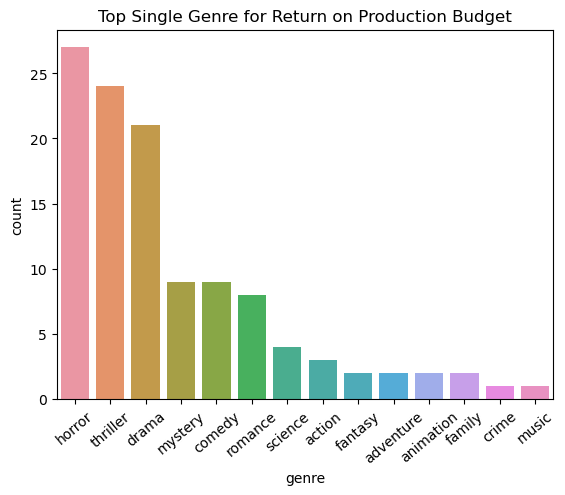

In [203]:
sns.barplot(data=genre_split_df, x='genre', y='count')
plt.title('Top Single Genre for Return on Production Budget')
plt.xticks(rotation=40)
None

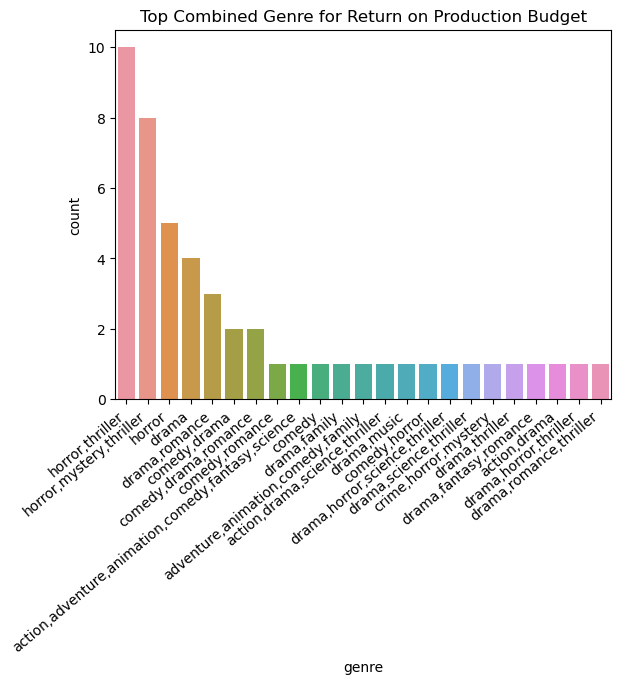

In [204]:
sns.barplot(data=genre_combined_df, x='genre', y='count')
plt.title('Top Combined Genre for Return on Production Budget')
plt.xticks(rotation=40, horizontalalignment='right')
None

<Axes: xlabel='popularity', ylabel='total_gross'>

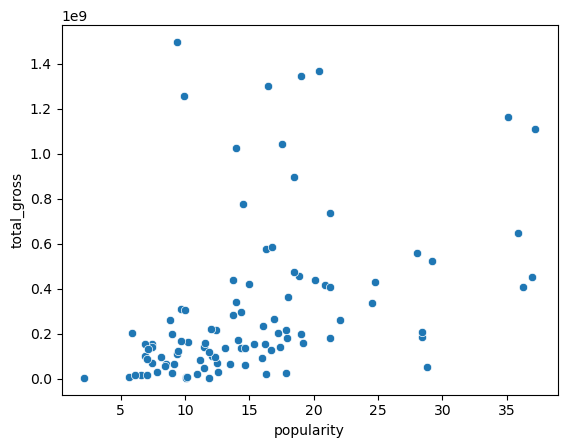

In [164]:
sns.scatterplot(data=budget_genre.iloc[:100], x='popularity', y='total_gross')

<Axes: xlabel='vote_average', ylabel='popularity'>

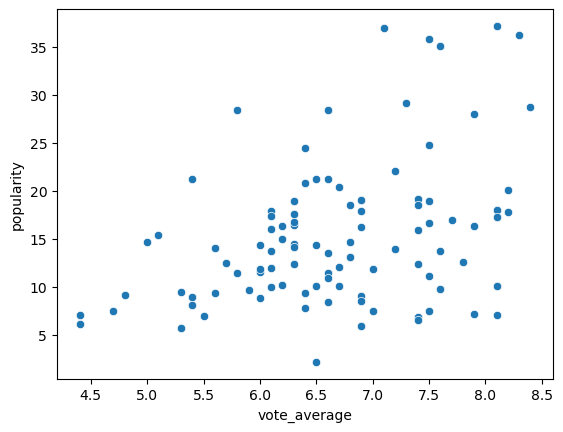

In [165]:
sns.scatterplot(data=budget_genre.iloc[:100], x='vote_average', y='popularity')

In [166]:
grouped_by_genre = budget_genre.groupby('genre')

In [167]:
at_least_5 = grouped_by_genre.filter(lambda x: len(x) >= 5)

In [187]:
median_genre = at_least_5.groupby('genre').ropb.median().sort_values(ascending=False)
median_genre_df = median_genre.reset_index()
median_genre_df.columns = ['genre', 'median worldwide gross vs. production budget']

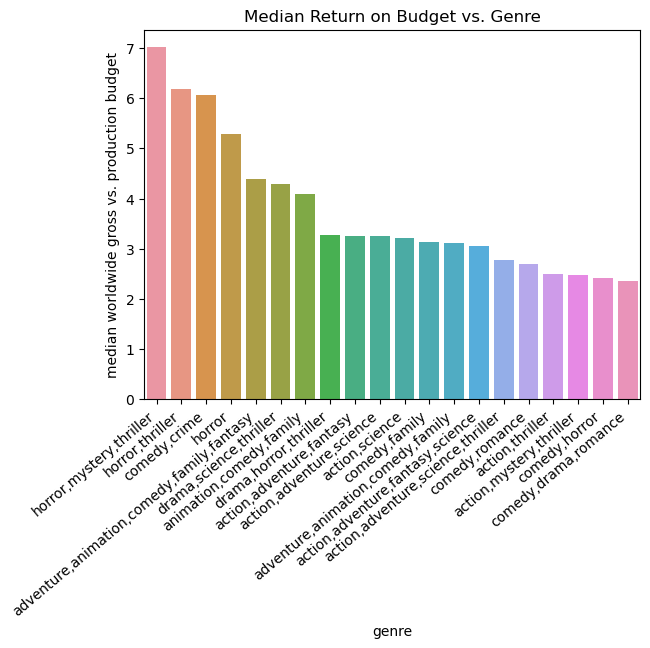

In [206]:
sns.barplot(data=median_genre_df.iloc[:20], x='genre', y='median worldwide gross vs. production budget')
plt.title('Median Return on Budget vs. Genre')
plt.xticks(rotation=40, horizontalalignment='right')
None

In [207]:
budget_genre[budget_genre.genre == 'horror,mystery,thriller'].describe()

,total_gross,pb,ropb,both_gross,popularity,vote_average,vote_count
count,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,17.000000,17.000000,17.000000
mean,1.493676e+08,9.191176e+06,15.156452,9.920696e+07,14.573529,5.982353,2132.588235
std,1.219073e+08,8.391555e+06,13.882572,8.298793e+07,5.574956,0.859677,1953.829959
min,1.702547e+06,7.500000e+05,0.615151,9.227270e+05,8.683000,4.000000,326.000000
25%,7.350589e+07,5.000000e+06,4.074923,5.172364e+07,10.196000,5.500000,957.000000
50%,1.142034e+08,1.000000e+07,7.013390,7.013390e+07,12.408000,6.100000,1516.000000
75%,1.808046e+08,1.000000e+07,25.002052,1.250103e+08,16.999000,6.600000,2634.000000
max,4.314086e+08,3.500000e+07,51.073590,3.053849e+08,26.185000,7.500000,8760.000000


### Looking at the SQL database

In [210]:
con = sqlite3.connect('../data/im.db')

In [215]:
pd.read_sql('''
select *
from movie_basics
inner join principals
on movie_basics.movie_id = principals.movie_id
inner join persons
on principals.person_id = persons.person_id
where primary_title = 'Avatar' and category = 'director';
''', con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,ordering,person_id,category,job,characters,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1775309,Avatar,Abatâ,2011,93.0,Horror,tt1775309,5,nm3786927,director,None,None,nm3786927,Atsushi Wada,None,None,director


In [221]:
voted_movies_df = pd.read_sql('''
select *
from movie_basics
inner join movie_ratings
on movie_basics.movie_id = movie_ratings.movie_id
where numvotes > 100;
''', con)

In [226]:
voted_movies_df['augmented_score'] = voted_movies_df.averagerating * np.log10(voted_movies_df.numvotes)

In [236]:
voted_movies_df.numvotes

0          559
1        50352
2          326
3         1613
4          571
         ...  
28643      338
28644     4057
28645      161
28646      317
28647      128
Name: numvotes, Length: 28648, dtype: int64

In [239]:
np.exp(voted_movies_df.numvotes.astype(np.longdouble))

0        5.896786e+242
1                  inf
2        3.801904e+141
3                  inf
4        9.597302e+247
             ...      
28643    6.187780e+146
28644              inf
28645     8.344716e+69
28646    4.691922e+137
28647     3.887708e+55
Name: numvotes, Length: 28648, dtype: float64

In [237]:
voted_movies_df['underrated_score'] = voted_movies_df.averagerating * np.exp(voted_movies_df.numvotes.astype(np.float128))

AttributeError: module 'numpy' has no attribute 'float128'

In [232]:
voted_movies_df.sort_values('averagerating', ascending=False).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,augmented_score
17832,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,tt9537008,9.9,417,25.939347
24688,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",tt7131622,9.7,5600,36.357424
28632,tt8718580,Eghantham,Eghantham,2018,125.0,Drama,tt8718580,9.7,639,27.213358
10771,tt6058226,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History",tt6058226,9.6,2604,32.790153
25341,tt9760512,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action,tt9760512,9.6,427,25.252108
1588,tt9680166,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,tt9680166,9.6,624,26.833772
7867,tt9343826,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",tt9343826,9.6,808,27.911149
21110,tt4131686,I Want to Live,I Want to Live,2015,106.0,"Adventure,Biography,Documentary",tt4131686,9.6,1339,30.017094
4910,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",tt5963218,9.5,6509,36.228386
24276,tt8866064,10 Days Before the Wedding,10 Days Before the Wedding,2018,120.0,"Comedy,Drama,Musical",tt8866064,9.5,354,24.215531


In [231]:
voted_movies_df.sort_values(by=['augmented_score'], ascending=False).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,augmented_score
24787,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,55.132610
9881,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,52.577999
3589,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,51.595464
15032,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,51.099631
23388,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135,49.672229
12696,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",tt1675434,8.5,677343,49.561873
27914,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926,49.526734
15495,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,49.323742
12947,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916,49.216921
18808,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,49.193124


In [234]:
voted_movies_df.sort_values(by=['underrated_score'], ascending=False).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,augmented_score,underrated_score
21796,tt1545106,Vamps,Vamps,2012,92.0,"Comedy,Horror,Romance",tt1545106,5.2,8838,20.521041,inf
8106,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",tt2024544,8.1,577301,46.667359,inf
21090,tt3918368,Pokémon the Movie: Diancie and the Cocoon of D...,Pokemon Za Mûbî XY: Hakai no Mayu to Dianshî,2014,76.0,"Action,Adventure,Animation",tt3918368,5.6,935,16.636545,inf
8095,tt1982882,True Bloodthirst,True Bloodthirst,2012,90.0,"Action,Horror,Sci-Fi",tt1982882,4.2,1485,13.321251,inf
8096,tt1988774,Salt n' Pepper,Salt n' Pepper,2011,118.0,"Comedy,Drama,Romance",tt1988774,7.4,1539,23.585566,inf
21084,tt3879200,Driving While Black,Driving While Black,2015,94.0,"Comedy,Drama",tt3879200,7.7,1388,24.196399,inf
21079,tt3859304,The Bronze,The Bronze,2015,100.0,"Comedy,Drama,Sport",tt3859304,6.0,9043,23.737875,inf
21075,tt3824412,Results,Results,2015,105.0,"Comedy,Romance",tt3824412,5.4,5811,20.326955,inf
13208,tt4550098,Nocturnal Animals,Nocturnal Animals,2016,116.0,"Drama,Thriller",tt4550098,7.5,205240,39.841965,inf
13205,tt4515684,The Treasure,Comoara,2015,89.0,Comedy,tt4515684,6.7,2357,22.594809,inf


In [240]:
con.close()